In [1]:
import csv
import urllib.request
from datetime import date
import os
from os import path
import pylab as pl
from matplotlib import collections as mc
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd


url="https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv"

if(not path.exists("data_"+str(date.today())+".csv")):
	urllib.request.urlretrieve(url,"data_"+str(date.today())+".csv")




inLabels=open("countyLabels.txt",'r')
countyNum=int(inLabels.readline())
countyNames=[]
adjacencyMap=[]


for county in range(0,countyNum):
	inData=inLabels.readline().split("\t")
	countyID=inData[1].split("\n")[0]
	adjacency=inData[2].split("\n")[0]
	adjacencyMap.append((int(countyID),int(adjacency)))
	inData=inData[0].split(',')[0]
	inData=inData.split("\"")[1]
	countyNames.append(inData)
	

caseDataCsv=open("data_"+str(date.today())+".csv",newline='\n')
parsedData=csv.reader(caseDataCsv,delimiter=",")

timeSeriesData=[]


# first, point to the first line of the data in counties we have already identified
inState=False
listIndex=0

contFlag=True
for index,row in enumerate(parsedData):
	if(index>2):
		for listCheck in adjacencyMap:
			if(int(row[0])==listCheck[0]):
				timeSeriesData.append([listCheck[1]])
				timeSeriesData[listCheck[1]].append(row[4:])

for firstIndex,data in enumerate(timeSeriesData):
	for secondIndex,secondData in enumerate(timeSeriesData[firstIndex][1]):
		timeSeriesData[firstIndex][1][secondIndex]=int(timeSeriesData[firstIndex][1][secondIndex])
		
dataDictionary={}

for index,data in enumerate(timeSeriesData):
	dataDictionary[countyNames[index]]=timeSeriesData[index][1]

dataFrame=pd.DataFrame(data=dataDictionary)
df = dataFrame

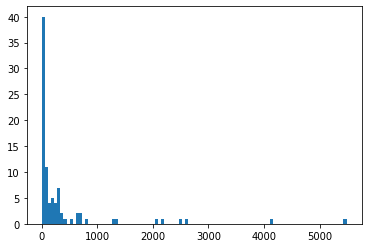

In [2]:
plt.hist(df.iloc[126], bins=100)
plt.show()

In [3]:
enc = 'latin-1'
pop = pd.read_csv('co-est2019-alldata.csv', encoding=enc)
pop.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [4]:
ohio_pop = pop.loc[pop['STNAME'] == 'Ohio']
ohio_pop.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
2078,40,2,3,39,0,Ohio,Ohio,11536504,11536751,11539336,...,-1.105564,-1.900104,-1.878444,0.335559,-0.055998,-0.500254,-0.335715,0.934403,0.081934,-0.287861
2079,50,2,3,39,1,Ohio,Adams County,28550,28541,28537,...,-0.758232,-4.421363,-6.096701,-8.229577,-0.213694,-3.929133,-3.193799,-1.619870,-3.029920,-0.577701
2080,50,2,3,39,3,Ohio,Allen County,106331,106313,106358,...,-4.885993,-5.754759,-8.682397,-3.214471,-4.344864,-8.614790,-5.873630,-5.795671,-5.033573,-4.964013
2081,50,2,3,39,5,Ohio,Ashland County,53139,53140,53321,...,-5.317660,-1.764049,-1.389789,-2.763366,-2.219839,1.502757,3.594496,3.190834,0.018628,-4.272787
2082,50,2,3,39,7,Ohio,Ashtabula County,101497,101489,101403,...,-3.151498,-3.150804,-7.619067,-4.360044,-6.670926,-5.287923,-1.831362,-3.378947,-1.105793,-3.213091


In [5]:
ohio_2019_pop = ohio_pop['POPESTIMATE2019'].iloc[1:]
ohio_2019_pop.head()

2079     27698
2080    102351
2081     53484
2082     97241
2083     65327
Name: POPESTIMATE2019, dtype: int64

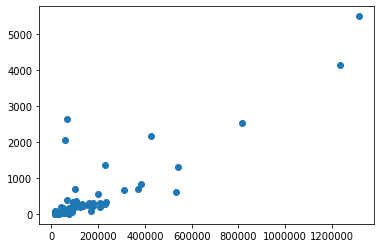

In [6]:
plt.scatter(ohio_2019_pop, df.iloc[126])

In [7]:
mobility_file = open('Global_Mobility_Report.csv','r')
ohio_mobility = []
for line in mobility_file :
    fields = line.split(',')
    if(fields[2] == 'Ohio') :
        ohio_mobility.append(line.strip())
ohio_mobility
latest = []
county_set = set()
for row in ohio_mobility[::-1] :
    fields = row.split(',')
    if(fields[3] not in county_set and fields[3] != '' and fields[4] < "2020-03-30") :
        cfbs = []
        for x in fields[5:] :
            if x != '' :
                cfbs.append(int(x))
        latest.append(np.mean(cfbs))
        county_set.add(fields[3])
#latest[::-1]
latest_df = pd.DataFrame(latest[::-1])
latest_df

,0
0,-17.00
1,-24.60
2,-26.00
3,-15.20
4,-38.00
...,...
83,-31.00
84,-20.75
85,-34.50
86,-27.20


In [8]:
final_df = pd.DataFrame()
final_df['covid'] = df.iloc[126]
final_df['mobility'] = latest[::-1]
final_df['pop'] = ohio_2019_pop.to_list()
final_df

,covid,mobility,pop
Adams County,8,-17.00,27698
Allen County,201,-24.60,102351
Ashland County,19,-26.00,53484
Ashtabula County,316,-15.20,97241
Athens County,18,-38.00,65327
...,...,...,...
Washington County,118,-31.00,59911
Wayne County,256,-20.75,115710
Williams County,51,-34.50,36692
Wood County,280,-27.20,130817


In [9]:
fdf_copy = final_df.copy()
fdf_train = fdf_copy.sample(frac = .8, random_state = 314)
fdf_test = fdf_copy.drop(fdf_train.index)
fdf_train.head()

,covid,mobility,pop
Belmont County,403,-24.75,67006
Fulton County,36,-32.00,42126
Greene County,98,2.60,168937
Defiance County,33,-37.00,38087
Pike County,6,-26.00,27772


In [10]:
fdf_train.corr()['covid'].sort_values()

mobility    0.366677
pop         0.873694
covid       1.000000
Name: covid, dtype: float64

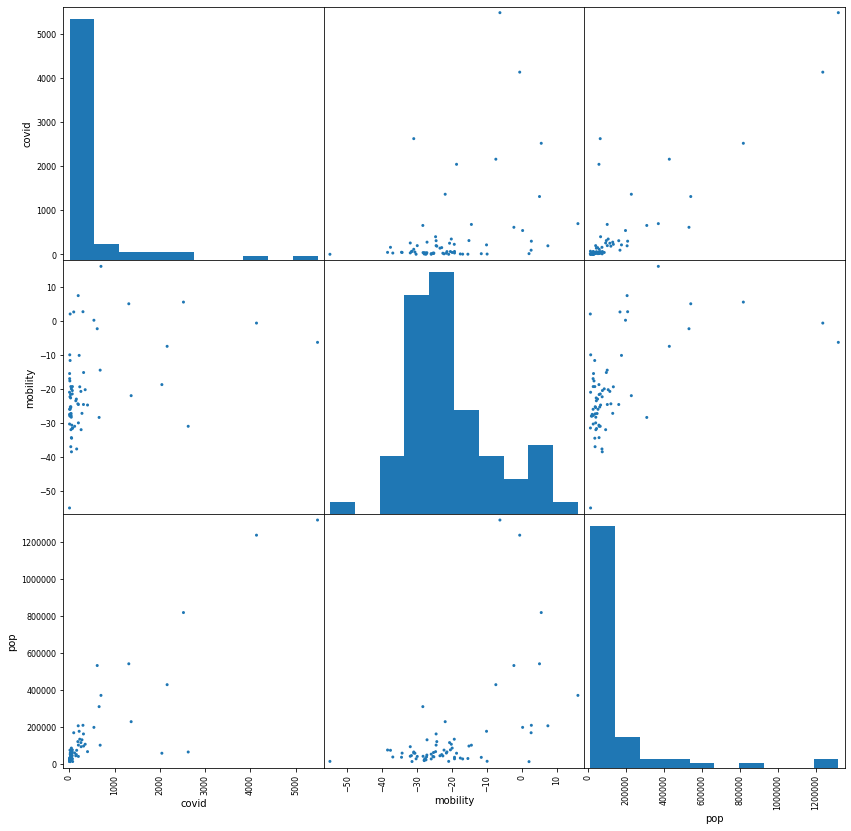

In [11]:
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

scatter_matrix(fdf_train, figsize = (14,14), alpha = 1)
plt.show()

In [12]:
reg = LinearRegression(copy_X = True)

In [13]:
reg.fit(fdf_train[['pop','mobility']],fdf_train['covid'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print("beta_0_hat is",np.round(reg.intercept_,5))
print("beta_1_hat is",np.round(reg.coef_[0],5))
print("beta_2_hat is",np.round(reg.coef_[1],5))

beta_0_hat is -304.2414
beta_1_hat is 0.00375
beta_2_hat is -10.14434


In [15]:
pred = reg.predict(fdf_test[['pop','mobility']])
print(np.sqrt(np.sum(np.power(pred-fdf_test['covid'],2))/len(fdf_test['covid'])))

195.4557251944125


In [16]:
# get the prediction this is where meshgrid comes in handy
x1s = np.linspace(fdf_train['pop'].min(), fdf_train['pop'].max(), 10)
x2s = np.linspace(fdf_train['mobility'].min(), fdf_train['mobility'].max(), 10)

# this makes a meshgrid
x1v, x2v = np.meshgrid(x1s, x2s)

# combine x1v and x2v into a single array for prediction
X_grid = np.concatenate([x1v.reshape(-1,1), x2v.reshape(-1,1)], axis=1)

# predict at each grid point
pred_grid = reg.predict(X_grid)

# add the predictions to the grid array
X_grid = np.concatenate([X_grid, pred_grid.reshape(-1,1)], axis=1)

<IPython.core.display.Javascript object>


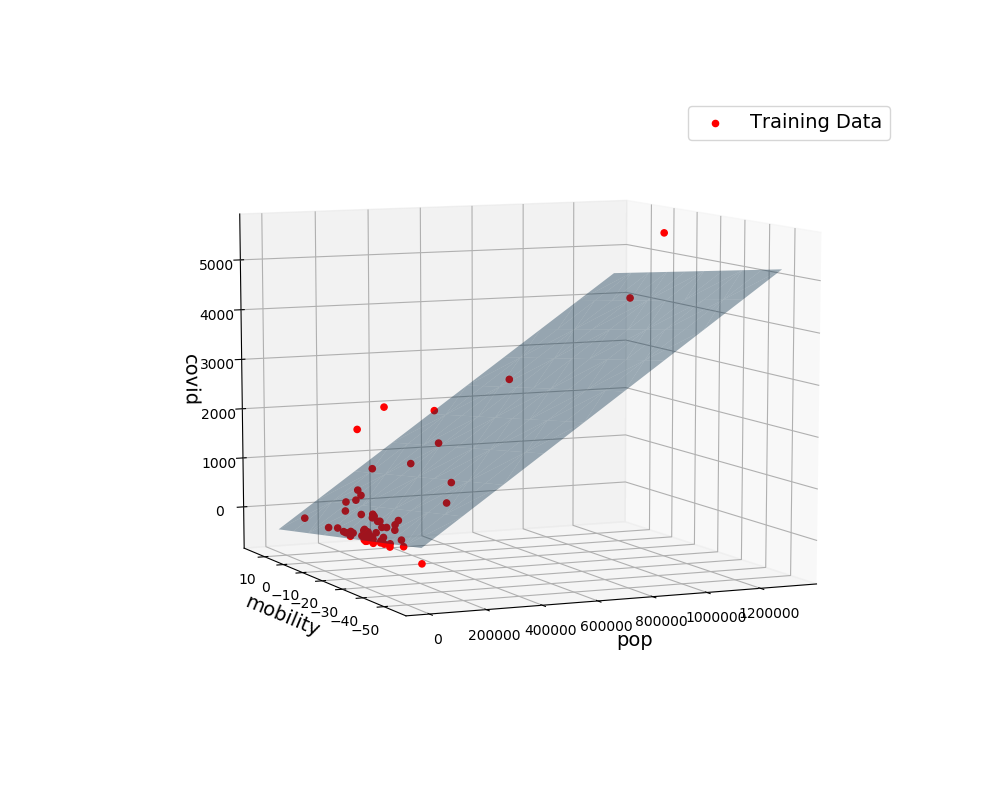

In [17]:
%matplotlib notebook
from numpy import meshgrid
from mpl_toolkits.mplot3d import Axes3D
# Now we plot the regression plane
# along with the training observations

# Make a figure object
fig = plt.figure(figsize=(10,8))

# We'll add a 3d subplot object
ax = fig.add_subplot(111, projection='3d')

# plot_trisurf makes a surface out of triangles
# it will take in the TV grid on the x-axis
# the radio grid on the y-axis
# and the prediction grid on the z-axis
# alpha <1 allows us to see through the surface
ax.plot_trisurf(X_grid[:, 0], X_grid[:, 1], X_grid[:,2], alpha=0.4)

# scatter will plot the observations from the training set
ax.scatter(fdf_train['pop'], fdf_train['mobility'], fdf_train['covid'], c="r", alpha=1, label="Training Data")

# Add labels
ax.set_xlabel("pop", fontsize=14)
ax.set_ylabel("mobility", fontsize=14)
ax.set_zlabel("covid", fontsize=14)

plt.legend(fontsize=14)

plt.show()